<a href="https://colab.research.google.com/github/arthurmls/quant-notebooks/blob/main/Optimisation_Portefeuille.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [ ]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)

In [ ]:
stocks.columns = ['aapl','cisco','ibm','amzn']

In [ ]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [ ]:
stocks.pct_change(1).mean()

,0
aapl,0.000750
cisco,0.000599
ibm,0.000081
amzn,0.001328


In [ ]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [ ]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [ ]:
log_ret = np.log(stocks/stocks.shift(1))

In [ ]:
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


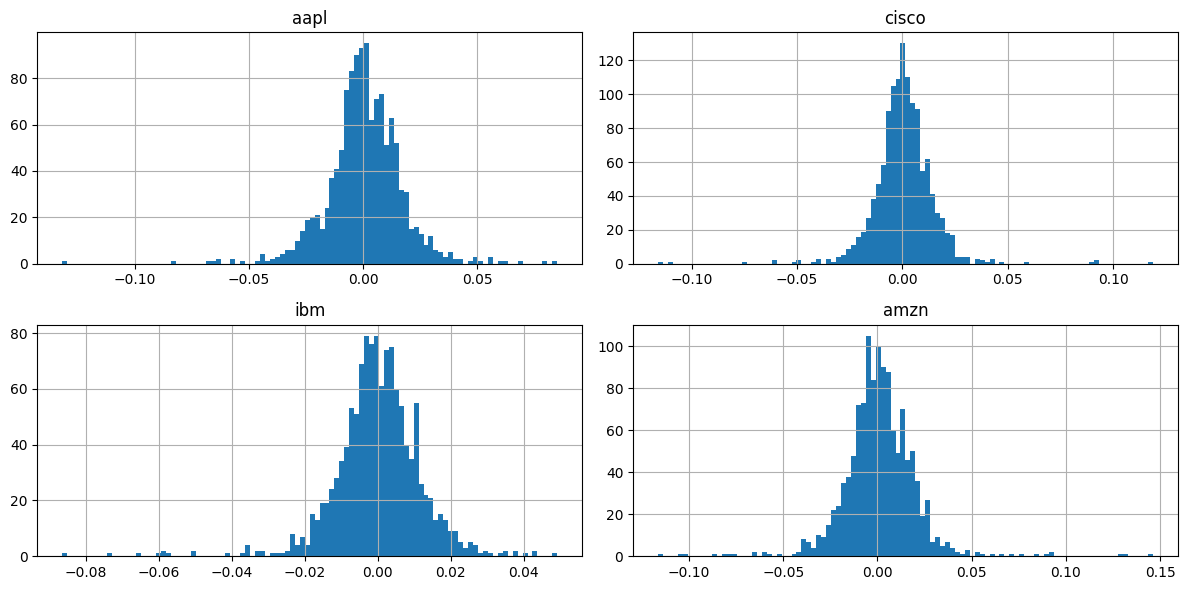

In [ ]:
log_ret.hist(bins=100,figsize=(12,6))
plt.tight_layout()

In [ ]:
log_ret.mean()

,0
aapl,0.000614
cisco,0.000497
ibm,0.000011
amzn,0.001139


In [ ]:
log_ret.corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301328,0.294922,0.236312
cisco,0.301328,1.000000,0.423915,0.286434
ibm,0.294922,0.423915,1.000000,0.259051
amzn,0.236312,0.286434,0.259051,1.000000


In [ ]:
log_ret.cov()*252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [ ]:
print(stocks.columns)

weights = np.array(np.random.random(4))
print('poids aléatoires:')
print(weights)

print('(re)pondération des poids')
weights = weights / np.sum(weights)
print(weights)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
poids aléatoires:
[0.41379202 0.53209732 0.54232532 0.34645376]
(re)pondération des poids
[0.22554049 0.2900237  0.29559855 0.18883726]


In [ ]:
np.random.seed(101)

print(stocks.columns)

weights = np.array(np.random.random(4))
print('poids aléatoires:')
print(weights)

print('(re)pondération des poids')
weights = weights / np.sum(weights)
print(weights)

# Rendement attendu
print('Rendement attendu du Portefeuille')
exp_ret = np.sum(log_ret.mean() * weights * 252)
print(exp_ret)

# Volatilité attendue
print('Volatilité attendue')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
print(exp_vol)

# Ratio de Sharpe
print('Ratio de Sharpe')
SR = exp_ret/exp_vol
print(SR)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
poids aléatoires:
[0.51639863 0.57066759 0.02847423 0.17152166]
(re)pondération des poids
[0.40122278 0.44338777 0.02212343 0.13326603]
Rendement attendu du Portefeuille
0.15599272049632507
Volatilité attendue
0.18502649565908932
Ratio de Sharpe
0.8430831483926556


In [ ]:
# Règlage du seed (optionnel)
np.random.seed(101)

# Colonnes d'actions (Stocks)
print('Stocks')
print(stocks.columns)
print('\n')

# Créer des poids aléatoires
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Re-pondération des Poids
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Rendement attendu ou escompté
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# variance attendue ou escomptée
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Ratio de Sharpe
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.1559927204963251


Expected Volatility
0.18502649565908932


Sharpe Ratio
0.8430831483926559


In [ ]:
# Règlage du seed (optionnel)
np.random.seed(101)

# Colonnes d'actions (Stocks)
print('Stocks')
print(stocks.columns)
print('\n')

# Créer des poids aléatoires
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Re-pondération des Poids
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Rendement attendu ou escompté
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# variance attendue ou escomptée
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Ratio de Sharpe
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.1559927204963251


Expected Volatility
0.18502649565908932


Sharpe Ratio
0.8430831483926559


In [ ]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Poids
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)

    # Sauvegarde des poids
    all_weights[ind,:] = weights

    # Rendement attendu
    ret_arr[ind] = np.sum(log_ret.mean() * weights * 252)

    # Volatilité attendue
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    # Ratio de Sharpe
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [ ]:
sharpe_arr.max()

1.0303260551271316

In [ ]:
sharpe_arr.argmax()

1420

In [ ]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [ ]:
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

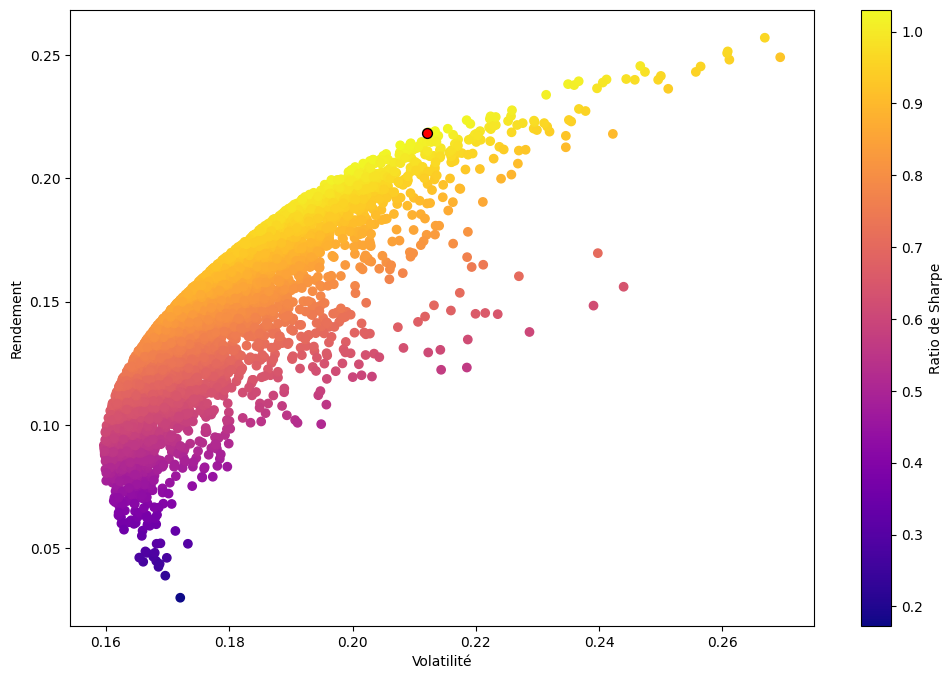

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Ratio de Sharpe')
plt.xlabel('Volatilité')
plt.ylabel('Rendement')

# Ajouter un point rouge pour le SR max
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [ ]:
def get_ret_vol_sr(weights):

    weights = np.array(weights)
    ret = np.sum(log_ret.mean()*weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol

    return np.array([ret,vol,sr])

In [ ]:
from scipy.optimize import minimize

In [ ]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

In [ ]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [ ]:
# Contraintes
def check_sum(weights):
  # retourne 0 si la somme des poids vaut 1
    return np.sum(weights) - 1

In [ ]:
# Par convention de fonction de minimisation, il devrait s'agir d'une fonction qui retourne zéro pour certaines conditions
cons = ({'type':'eq','fun':check_sum})

In [ ]:
# 0-1 pour chaque poids
bounds = ((0,1),(0,1),(0,1),(0,1))

In [ ]:
# Hypothèse initiale (répartition égale)
init_guess = [0.25,0.25,0.25,0.25]

In [ ]:
# Sequential Least Squares Programming (SLSQP)
# Programmation séquentielle des moindres carrés
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [ ]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0307168703367493
       x: [ 2.663e-01  2.042e-01  7.820e-17  5.295e-01]
     nit: 7
     jac: [ 5.640e-05  4.181e-05  3.399e-01 -4.449e-05]
    nfev: 35
    njev: 7

In [ ]:
opt_results.x

array([2.66289773e-01, 2.04189803e-01, 7.81980817e-17, 5.29520423e-01])

In [ ]:
get_ret_vol_sr(opt_results.x)

array([0.21885916, 0.21233683, 1.03071687])

In [ ]:
# Nos rendements vont de 0 à 0.3
# Créer un nombre de points linéairement espacés pour calculer x dessus
frontier_y = np.linspace(0,0.3,100) # Changez 100 à un chiffre inférieur pour les ordinateurs plus lents !

In [ ]:
def minimize_volatility(weights):
  return get_ret_vol_sr(weights)[1]

In [ ]:
frontier_volatility = []

for possible_return in frontier_y:
  # contraintes
  cons = ({'type':'eq','fun':check_sum},
          {'type':'eq','fun':lambda w:get_ret_vol_sr(w)[0] - possible_return})

  result = minimize(minimize_volatility,init_guess,method='SLSQP',
                    bounds=bounds,constraints=cons)

  frontier_volatility.append(result['fun'])

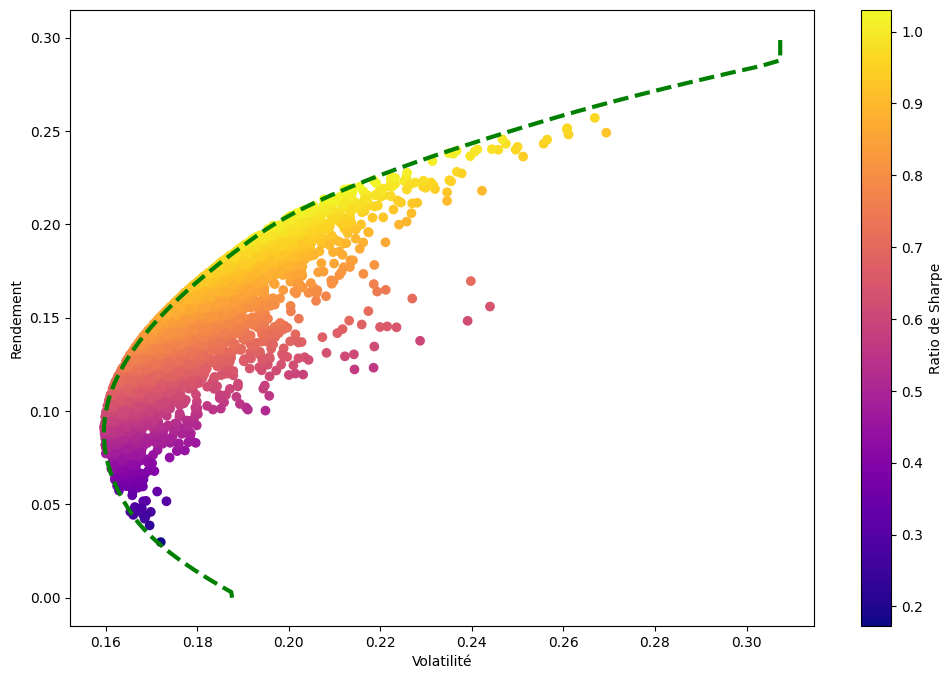

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Ratio de Sharpe')
plt.xlabel('Volatilité')
plt.ylabel('Rendement')

# Ajouter une ligne de frontière
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)